# Binary Search Tree

In [96]:
### Big O
#### Insertion - O(logN)
#### Searching - O(logN)
#### For worst cases O(N)

In [134]:
import networkx as nx
import matplotlib.pyplot as plt

In [101]:
class Node:
    """Class to create Node of the BST"""
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [176]:
class BinarySearchTree:
    """Class to create BST"""
    
    def __init__(self):
        self.root = None
        
    
    def insert(self, value):
        """Inserting a node in a BST. Returns updated BST"""
        
        # create a new node
        new_node = Node(value)
        # check if there is a root, if not - the root now becomes
        # that new node
        if not self.root:
            self.root = new_node
            return self
        # if there is a root, check if the value of the new node is 
        # greater than or less than value of the root
        current_node = self.root
        while True:
            # if greater
            if new_node.value > current_node.value:
                # check if there is no node to the right
                if not current_node.right:
                    # add new node as the right property
                    current_node.right = new_node
                    return self
                # if there is a node move to that node
                # and repeat steps
                current_node = current_node.right
            # if it is less
            elif new_node.value < current_node.value:
                # check if there is no node to the left
                if not current_node.left:
                    # add new node as the left property
                    current_node.left = new_node
                    return self
                # if there is a node move to that node
                # and repeat steps
                current_node = current_node.left
            # if new node value equal to current one (already exist
            # in BST) than do nothing
            else:
                return None
            
    
    def contains(self, value):
        """Check if BST contains a node. Returns True or False"""
        
        # check if there is a root
        if not self.root:
            return False
        current_node = self.root
        # check nodes until there is one
        while current_node:
            # if value is less than the current node value than
            # move current node to node to the left
            if value < current_node.value:
                current_node = current_node.left
            # if value is greater than the current node value than
            # move current node to node to the right
            elif value > current_node.value:
                current_node = current_node.right
            # if value is equal to current node value
            else:
                return True
        return False
    
    
    def bfs(self):
        """
        Breadth first search. 
        Visit every node on the same BST level
        Check every sibling node before look at a child"""
        
        # 'queue' (First In First Out) to track nodes to check
        queue = []
        # list to store the values of the nodes visited
        visited = []
        # place the root node in the queue
        queue.append(self.root)
        while queue:
            # dequeue a node from the queue and 
            current_node = queue.pop(0)
            # append the value of the node into the visited list
            visited.append(current_node.value)
            # if there is a left property on the node dequeued
            if current_node.left:
                # add left node to the queue
                queue.append(current_node.left)
            # if there is a right property on the node dequeued
            if current_node.right:
                # add right node to the queue
                queue.append(current_node.right)
        return visited

    def nodes_connections(self):
        """
        Returns list with nodes values with left and right nodes.
        Uses BFS approach
        """
        
        queue = []
        visited = []
        queue.append(self.root)
        while queue:
            current_node = queue.pop(0)
            if current_node.left and current_node.right:
                visited.append((current_node.left.value, current_node.value, current_node.right.value))
                queue.extend([current_node.left, current_node.right])
            elif current_node.left and not current_node.right:
                visited.append((current_node.left.value, current_node.value, None))
                queue.append(current_node.left)
            elif current_node.right and not current_node.left:
                visited.append((None, current_node.value, current_node.right.value))
                queue.append(current_node.right)
            else:
                visited.append((None, current_node.value, None))
        return visited
    
    
    def graph(self):
        """
        Builds BST graph
        """
        
        nodes = self.nodes_connections()
        bst_graph = nx.Graph()
        if self.root:
            root_value = self.root.value
        for node in nodes:
            bst_graph.add_node(node[1])
            if node[0]:
                bst_graph.add_node(node[0])
                bst_graph.add_edge(node[1], node[0])
            if node[2]:
                bst_graph.add_node(node[2])
                bst_graph.add_edge(node[1], node[2])
        
        print("Nodes of graph: ", bst_graph.nodes())
        
        bst_graph = nx.relabel_nodes(bst_graph, {root_value: 'ROOT ' + str(root_value)})
        
        nx.draw(bst_graph, with_labels = True)
        
        
        def dfs(self):
            """
            Depth First Search.
            Traverse nodes vertically down till the end of the tree
            before visiting sibling nodes
            """

In [177]:
bst = BinarySearchTree()

In [178]:
lst = [67,56,23,45,98,34,98,12,31,87,29]
for i in lst:
    bst.insert(i)

In [179]:
bst.insert(25)

In [180]:
bst.insert(38)

In [181]:
bst.contains(38)

True

In [182]:
bst.print_nodes()

[67, 56, 98, 23, 87, 12, 45, 34, 31, 38, 29, 25]

In [183]:
bst.nodes_connections()

[(56, 67, 98),
 (23, 56, None),
 (87, 98, None),
 (12, 23, 45),
 (None, 87, None),
 (None, 12, None),
 (34, 45, None),
 (31, 34, 38),
 (29, 31, None),
 (None, 38, None),
 (25, 29, None),
 (None, 25, None)]

Nodes of graph:  [67, 56, 98, 23, 87, 12, 45, 34, 31, 38, 29, 25]


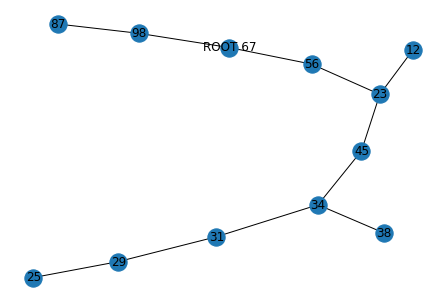

In [184]:
bst.graph()

In [185]:
bst.insert(156)

Nodes of graph:  [67, 56, 98, 23, 87, 156, 12, 45, 34, 31, 38, 29, 25]


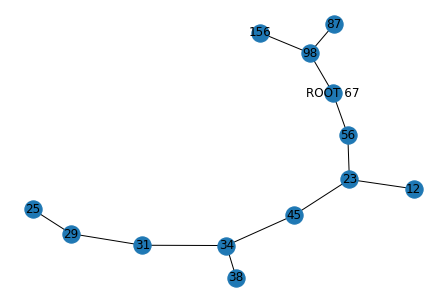

In [186]:
bst.graph()

Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York')]


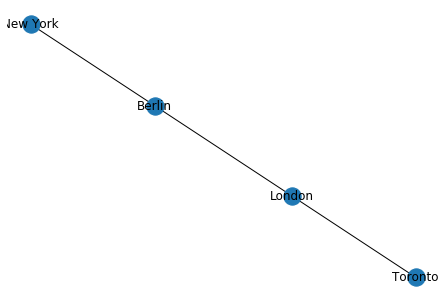

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.path_graph(4)
cities = {0:"Toronto",1:"London",2:"Berlin",3:"New York"}

H=nx.relabel_nodes(G,cities)
 
print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())
nx.draw(H, with_labels = True)
# plt.savefig("path_graph_cities.png")
# plt.show()


In [143]:
bst = nx.Graph()

In [144]:
bst.add_node('45')
bst.add_node('12')
bst.add_node('35')
bst.add_node('6')
bst.add_node(8)

In [139]:
bst.add_edge('45', '12')
bst.add_edge('45', '35')
bst.add_edge('12', '6')
bst.add_edge('12', 8)

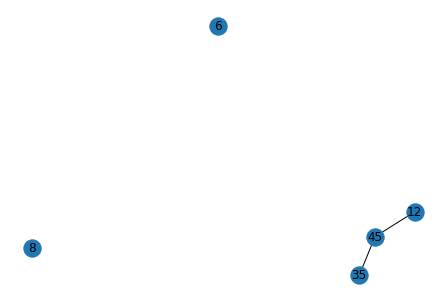

In [145]:
bst.add_edge('45', '12')
bst.add_edge('45', '35')
nx.draw(bst, with_labels = True)

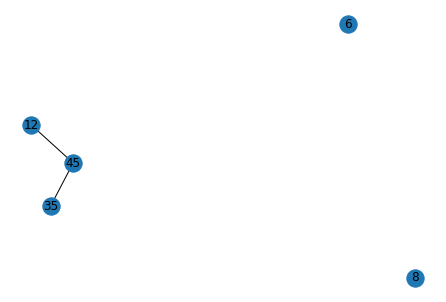

In [146]:
bst.add_edge('12', '45')
bst.add_edge('35', '45')
nx.draw(bst, with_labels = True)

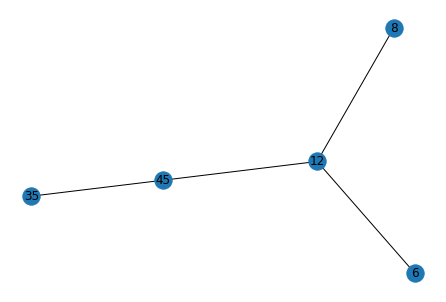

In [140]:
nx.draw(bst, with_labels = True)